In [ ]:
# !conda install -c conda-forge ipywidgets -y

In [21]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import widgets

## Read the Data

In [35]:
DATAPATH='../assets'
FILENAME='Prices.xlsx'
PERIOD='Daily'
PERIOD_SHEET_MAP={'Daily':'Daily','Weekly':'Weekly_EoP','Monthly':'Monthly_EoP','Quarterly':'Quarterly_EoP','Yearly':'Yearly_EoP'}

In [23]:
df_gold=pd.read_excel(os.path.join(DATAPATH,FILENAME),sheet_name=PERIOD_SHEET_MAP[PERIOD],skiprows=5,usecols=[*range(2,22)])
df_gold.rename({'Unnamed: 2':'Date'},axis=1,inplace=True)
df_gold.set_index('Date', inplace=True)

df_gold.head()

,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
Date,,,,,,,,,,,,,,,,,,,
1978-12-29,226.00,137.06,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-01,226.00,137.06,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-02,226.80,137.29,43164.91,111.45,263.74,359.62,1792.85,NaN,NaN,735.60,138160.45,851.29,4454.55,NaN,NaN,107470.04,NaN,194.56,193.61
1979-01-03,218.60,134.01,43717.90,107.98,264.39,365.87,1802.15,NaN,NaN,739.42,138877.01,855.71,4477.66,NaN,NaN,108027.43,NaN,192.23,192.97
1979-01-04,223.15,136.79,43674.89,110.66,264.14,366.38,1811.74,NaN,NaN,743.36,139616.26,860.26,4501.49,NaN,NaN,108602.47,NaN,193.01,194.55


## Data Exploration

In [24]:
currencies=df_gold.columns.tolist()
currencies

['USD',
 'EUR',
 'JPY',
 'GBP',
 'CAD',
 'CHF',
 'INR',
 'CNY',
 'TRY',
 'SAR',
 'IDR',
 'AED',
 'THB',
 'VND',
 'EGP',
 'KRW',
 'RUB',
 'ZAR',
 'AUD']

In [25]:
df_gold.isna().sum()

USD       0
EUR       0
JPY       2
GBP       0
CAD       2
CHF       2
INR       2
CNY    1571
TRY    1045
SAR       2
IDR       2
AED       2
THB       2
VND    2851
EGP    2591
KRW       2
RUB    3661
ZAR       2
AUD       2
dtype: int64

In [26]:
df_gold.describe()

,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
count,11666.000000,11666.000000,11664.000000,11666.000000,11664.000000,11664.000000,11664.000000,10095.000000,10621.000000,11664.000000,1.166400e+04,11664.000000,11664.000000,8.815000e+03,9075.000000,1.166400e+04,8005.000000,11664.000000,11664.000000
mean,747.585847,626.371378,90333.661235,498.310748,916.875796,868.780670,38407.777533,5294.587279,3297.426810,2783.913739,7.195041e+06,2747.639224,23618.822224,1.684408e+07,8867.914207,7.944677e+05,42077.370773,7129.953579,953.775022
std,523.291363,443.680638,54939.409592,401.974842,629.836356,404.819929,42611.758052,3647.856874,7635.514629,1975.470650,8.439651e+06,1921.177032,17636.543446,1.409398e+07,11861.623460,6.637266e+05,44540.095517,8952.063656,678.360945
min,216.850000,133.830000,26851.600000,107.980000,256.830000,359.620000,1782.010000,809.630000,0.080000,718.140000,1.351224e+05,825.530000,4374.720000,1.536705e+06,863.360000,1.068198e+05,132.710000,187.080000,189.800000
25%,355.812500,308.255000,43167.825000,219.237500,459.910000,502.517500,6490.527500,2219.120000,3.050000,1319.060000,7.078965e+05,1305.990000,9649.350000,4.136100e+06,1192.370000,3.031469e+05,7741.070000,986.745000,477.067500
50%,426.400000,377.340000,76388.530000,261.080000,538.905000,745.270000,13587.045000,3373.830000,529.590000,1567.960000,2.839250e+06,1565.840000,12747.800000,1.013918e+07,3337.510000,3.892490e+05,21067.160000,2139.470000,561.440000
75%,1225.000000,1001.815000,131953.482500,801.327500,1414.202500,1182.217500,74995.132500,8321.280000,2892.340000,4596.637500,1.472375e+07,4499.430000,40441.550000,2.875459e+07,9993.865000,1.365916e+06,72664.010000,13124.647500,1431.445000
max,2067.150000,1863.680000,285049.000000,1634.970000,2768.520000,1894.070000,167324.360000,14373.930000,53214.800000,7753.670000,3.040792e+07,7592.640000,69706.710000,4.802591e+07,63287.270000,2.708868e+06,285610.400000,39005.480000,3051.790000


In [37]:
PERIOD_FREQ_MAP={'Daily':'d','Weekly':'w','Monthly':'m','Quarterly':'q','Yearly':'y'}

In [27]:
df_gold = df_gold.asfreq(PERIOD_FREQ_MAP[PERIOD],method='ffill')
df_gold.head()

,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
Date,,,,,,,,,,,,,,,,,,,
1978-12-29,226.0,137.06,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978-12-30,226.0,137.06,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978-12-31,226.0,137.06,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-01,226.0,137.06,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-01-02,226.8,137.29,43164.91,111.45,263.74,359.62,1792.85,NaN,NaN,735.6,138160.45,851.29,4454.55,NaN,NaN,107470.04,NaN,194.56,193.61


In [9]:
df_gold.describe()

,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
count,16332.000000,16332.000000,16328.000000,16332.000000,16328.000000,16328.000000,16328.000000,14131.000000,14869.000000,16328.000000,1.632800e+04,16328.000000,16328.000000,1.233900e+04,12703.000000,1.632800e+04,11205.000000,16328.000000,16328.000000
mean,747.471797,626.279824,90321.691022,498.228872,916.788569,868.726164,38395.256354,5293.877140,3293.133566,2783.602024,7.193368e+06,2747.370869,23615.650849,1.684151e+07,8862.503666,7.943743e+05,42066.122972,7128.126531,953.677920
std,523.145231,443.556501,54908.480893,401.869061,629.687809,404.692398,42593.096409,3646.530951,7622.570007,1974.937229,8.437669e+06,1920.642776,17631.012900,1.408998e+07,11849.590815,6.635420e+05,44527.016635,8949.273646,678.218604
min,216.850000,133.830000,26851.600000,107.980000,256.830000,359.620000,1782.010000,809.630000,0.080000,718.140000,1.351224e+05,825.530000,4374.720000,1.536705e+06,863.360000,1.068198e+05,132.710000,187.080000,189.800000
25%,355.750000,308.230000,43164.480000,219.320000,459.910000,502.600000,6496.220000,2218.490000,3.050000,1318.412500,7.081060e+05,1306.070000,9649.672500,4.136281e+06,1192.570000,3.030136e+05,7741.070000,986.320000,476.867500
50%,426.325000,377.420000,76329.530000,261.210000,538.880000,746.325000,13582.800000,3375.480000,529.590000,1567.720000,2.839553e+06,1565.840000,12744.665000,1.013918e+07,3337.510000,3.896873e+05,21126.820000,2139.470000,561.465000
75%,1224.425000,1001.250000,131880.710000,800.352500,1413.920000,1181.050000,74979.880000,8321.025000,2889.930000,4594.042500,1.472375e+07,4497.957500,40460.105000,2.875459e+07,9997.975000,1.366306e+06,72515.040000,13128.282500,1431.445000
max,2067.150000,1863.680000,285049.000000,1634.970000,2768.520000,1894.070000,167324.360000,14373.930000,53214.800000,7753.670000,3.040792e+07,7592.640000,69706.710000,4.802591e+07,63287.270000,2.708868e+06,285610.400000,39005.480000,3051.790000


In [10]:
df_gold.isna().sum()

USD       0
EUR       0
JPY       4
GBP       0
CAD       4
CHF       4
INR       4
CNY    2201
TRY    1463
SAR       4
IDR       4
AED       4
THB       4
VND    3993
EGP    3629
KRW       4
RUB    5127
ZAR       4
AUD       4
dtype: int64

In [20]:
df_gold.reset_index(inplace=True)
df_gold.head()

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,1978-12-29,226.0,137.06,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1978-12-30,226.0,137.06,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1978-12-31,226.0,137.06,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1979-01-01,226.0,137.06,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1979-01-02,226.8,137.29,43164.91,111.45,263.74,359.62,1792.85,NaN,NaN,735.6,138160.45,851.29,4454.55,NaN,NaN,107470.04,NaN,194.56,193.61


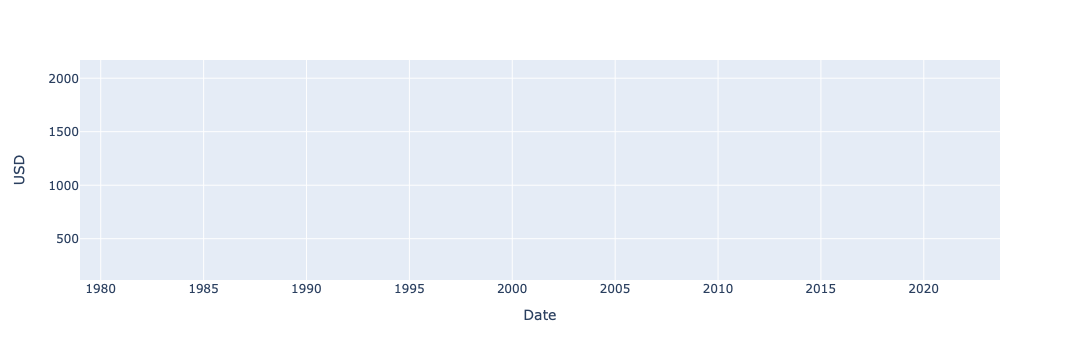

In [12]:
col='USD'
fig = px.line(df_gold, x='Date', y=col)
fig.show()

In [39]:
period = widgets.Dropdown(
    options=PERIOD_FREQ_MAP.keys(),
    value='Daily',
    description='Period',
)
currency = widgets.Dropdown(
    options=currencies,
    value='USD',
    description='Currency',
)
container = widgets.HBox(children=[period, currency])


def plot_gold_prices(curr,period):
    df_gold=pd.read_excel(os.path.join(DATAPATH,FILENAME),sheet_name=PERIOD_SHEET_MAP[period],skiprows=5,usecols=[*range(2,22)])
    df_gold.rename({'Unnamed: 2':'Date'},axis=1,inplace=True)
    #df_gold.set_index('Date', inplace=True)
    #df_gold = df_gold.asfreq(PERIOD_FREQ_MAP[period],method='ffill')
    #df_gold.reset_index(inplace=True)
    plt.figure()
    fig = px.line(df_gold, x='Date', y=curr,title='Gold price')
    fig.show()

out = widgets.interactive_output(plot_gold_prices, {'curr': currency, 'period': period})

display(container, out)

Output()

Hypothesis:

1. Period-to-Period rate of change
2. Moving Avg rate of return in 5-year period
3. Histogram of rate of change buckets
